## 🏞️ **Notebook de treinamento {VAE -  Fully Connected}**
***

> #### 📒 **Colab?**

In [1]:
'''
import os
from google.colab import drive

drive.mount('/content/drive')

!git clone https://github.com/cori4nder/vae-meandering-rivers

os.chdir('/content/vae-meandering-rivers')
!pwd
'''

"\nimport os\nfrom google.colab import drive\n\ndrive.mount('/content/drive')\n\n!git clone https://github.com/cori4nder/vae-meandering-rivers\n\nos.chdir('/content/vae-meandering-rivers')\n!pwd\n"

> ### 🔩 **Dependências**

In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [3]:
import torch
import torch.optim as optim

from train import Trainer
from utils.hdf5_utils import HDF5DataHandler
from analysis.plot_training_metrics import TrainingPlotter
from models.beta_vae_fully_connected import VAE_FConnected

c:\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] Não foi possível encontrar o procedimento especificado
  warn(f"Failed to load image Python extension: {e}")
c:\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


> ### 🤖 **Treinando modelo**

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [5]:
handler = HDF5DataHandler('../data/train_images.h5', test_size=0.2)

In [6]:
handler.load_data(split=True, norm=True)

| Keys  >>  ['train_images']
| Shape >> (50000, 128, 128, 1)
| Normalizaed images >> float32 / 255.0
| Train - 80.0% >> (40000, 1, 128, 128)
| Test  - 20.0% >> (10000, 1, 128, 128)
_________________________________________________________________________________



In [7]:
# handler.resize(new_size=(128, 128))
# transforma em tensores e gera os loaders
handler.prepare_tensors()

# Obtenção dos DataLoaders
train_loader, test_loader = handler.get_loaders()

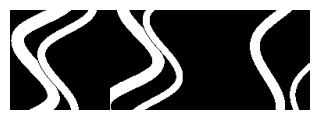

In [8]:
handler.show_samples(test_loader, num_images=3)

In [ ]:
model = VAE_FConnected().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

trainer = Trainer(model=model, optimizer=optimizer, device=device, train_loader=train_loader, epochs=200, batch_size=128)

Epoch 1/2:   0%|          | 1/313 [00:50<4:22:12, 50.43s/it]

In [ ]:
trainer.train()

In [ ]:
train_loss_plot = TrainingPlotter('training_log.csv')
train_loss_plot.plot_metrics()